#Q:Match similar products from the Flipkart dataset with the Amazon dataset

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
amazon = pd.read_excel('/content/amz_com.xlsx')

In [3]:
flipkart = pd.read_excel('/content/flipkart_com.xlsx')

In [4]:
amazon.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,ec475b0eb06a90ee1ec5794a314e065d,2015-12-01 06:13:00 +0000,http://www.flipkart.com/jewelizer-alloy-neckla...,Jewelizer Alloy Necklace,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",NKCDSCF3GCSWCNMP,-20,0,"[""http://img5a.flixcart.com/image/necklace-cha...",False,Jewelizer Alloy Necklace - Buy Jewelizer Alloy...,No rating available,No rating available,Jewelizer,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,6eade120ebeade57fcbc1120a6a2eeae,2015-12-01 06:13:00 +0000,http://www.flipkart.com/abb-premium-make-6-one...,ABB Premium Make 6 One Way Electrical Switch,"[""Home Improvement >> Electricals >> Switches ...",SCHE5Z57FHVKZD3C,-20,0,"[""http://img5a.flixcart.com/image/electrical-s...",False,ABB Premium Make 6 One Way Electrical Switch (...,No rating available,No rating available,ABB,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
2,f4ff5c04e3bb1171fbf06aa9154cf90c,2016-06-10 11:36:05 +0000,http://www.flipkart.com/monmione-women-s-push-...,Monmione Women's Push-up Bra,"[""Clothing >> Women's Clothing >> Sports & Gym...",BRAEGGPYTPBPJ3AD,-20,0,"[""http://img5a.flixcart.com/image/bra/x/y/a/fc...",False,Specifications of Monmione Women's Push-up Bra...,No rating available,No rating available,Monmione,"{""product_specification""=>[{""key""=>""Brand Colo..."
3,72251c555e30c587a23bd01ca73868ac,2015-12-01 12:40:44 +0000,http://www.flipkart.com/allure-auto-cm-839-car...,Allure Auto CM 839 Car Mat Toyota Corolla Altis,"[""Automotive >> Accessories & Spare parts >> C...",CRTECN2QW62MTXAJ,-19,0,"[""http://img6a.flixcart.com/image/car-mat/e/k/...",False,Buy Allure Auto CM 839 Car Mat Toyota Corolla ...,No rating available,No rating available,Allure Auto,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,cf519942dbf21758504367ad8795d418,2015-12-30 00:17:46 +0000,http://www.flipkart.com/india-inc-women-s-prin...,India Inc Women's Printed Casual Shirt,"[""Clothing >> Women's Clothing >> Western Wear...",SHTED87SZDKZSCUH,-19,0,"[""http://img6a.flixcart.com/image/shirt/t/g/u/...",False,India Inc Women's Printed Casual Shirt\n ...,No rating available,No rating available,Normal Fit,"{""product_specification""=>[{""key""=>""Pattern"", ..."


In [5]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


Pre Processing

In [6]:
amazon.isnull().sum()
amazon=amazon.dropna(axis=0)
amazon.shape

(14121, 15)

In [7]:
flipkart.isnull().sum()
flipkart=flipkart.dropna(axis=0)
flipkart.shape

(14058, 15)

In [8]:
amazon.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [9]:
amazon.drop(['crawl_timestamp', 'product_url',
       'product_category_tree', 'pid',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating','product_specifications'], axis=1, inplace=True)

In [10]:
flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [11]:
flipkart.drop(['crawl_timestamp', 'product_url',
       'product_category_tree', 'pid',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating','product_specifications'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
amazon.columns

Index(['uniq_id', 'product_name', 'retail_price', 'discounted_price', 'brand'], dtype='object')

In [13]:
amazon.head()

,uniq_id,product_name,retail_price,discounted_price,brand
0,ec475b0eb06a90ee1ec5794a314e065d,Jewelizer Alloy Necklace,-20,0,Jewelizer
1,6eade120ebeade57fcbc1120a6a2eeae,ABB Premium Make 6 One Way Electrical Switch,-20,0,ABB
2,f4ff5c04e3bb1171fbf06aa9154cf90c,Monmione Women's Push-up Bra,-20,0,Monmione
3,72251c555e30c587a23bd01ca73868ac,Allure Auto CM 839 Car Mat Toyota Corolla Altis,-19,0,Allure Auto
4,cf519942dbf21758504367ad8795d418,India Inc Women's Printed Casual Shirt,-19,0,Normal Fit


In [14]:
flipkart.columns

Index(['uniq_id', 'product_name', 'retail_price', 'discounted_price', 'brand'], dtype='object')

In [15]:
flipkart.head()

,uniq_id,product_name,retail_price,discounted_price,brand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,Sicons


In [16]:
amazon.describe

<bound method NDFrame.describe of                                 uniq_id  \
0      ec475b0eb06a90ee1ec5794a314e065d   
1      6eade120ebeade57fcbc1120a6a2eeae   
2      f4ff5c04e3bb1171fbf06aa9154cf90c   
3      72251c555e30c587a23bd01ca73868ac   
4      cf519942dbf21758504367ad8795d418   
...                                 ...   
19993  c4b045288524a8770c760ed2bbca2ed5   
19994  dd96000fa1d9e408a4fc47ea5c1123e5   
19996  07b0df742cdcac28d09c29a1e246fff2   
19997  d9fa5b1d8917b841abaef2a1ce032114   
19998  3a2546675bc399953779e58d84d56650   

                                            product_name  retail_price  \
0                               Jewelizer Alloy Necklace           -20   
1           ABB Premium Make 6 One Way Electrical Switch           -20   
2                           Monmione Women's Push-up Bra           -20   
3        Allure Auto CM 839 Car Mat Toyota Corolla Altis           -19   
4                 India Inc Women's Printed Casual Shirt           -19   
...  

In [17]:
flipkart.describe

<bound method NDFrame.describe of                                 uniq_id  \
0      c2d766ca982eca8304150849735ffef9   
1      7f7036a6d550aaa89d34c77bd39a5e48   
2      f449ec65dcbc041b6ae5e6a32717d01b   
3      0973b37acd0c664e3de26e97e5571454   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7   
...                                 ...   
19995  7179d2f6c4ad50a17d014ca1d2815156   
19996  71ac419198359d37b8fe5e3fffdfee09   
19997  93e9d343837400ce0d7980874ece471c   
19998  669e79b8fa5d9ae020841c0c97d5e935   
19999  cb4fa87a874f715fff567f7b7b3be79c   

                                  product_name  retail_price  \
0          Alisha Solid Women's Cycling Shorts         999.0   
1          FabHomeDecor Fabric Double Sofa Bed       32157.0   
2                                   AW Bellies         999.0   
3          Alisha Solid Women's Cycling Shorts         699.0   
4        Sicons All Purpose Arnica Dog Shampoo         220.0   
...                                        ...           ...   
1

In [18]:
display(amazon.dtypes)

uniq_id             object
product_name        object
retail_price         int64
discounted_price     int64
brand               object
dtype: object

In [19]:
display(flipkart.dtypes)

uniq_id              object
product_name         object
retail_price        float64
discounted_price    float64
brand                object
dtype: object

Checking Duplicate Enteries

In [20]:
amazon.duplicated().sum()

0

In [21]:
flipkart.duplicated().sum()

0

#Flipkart EDA

In [22]:
flipkart["brand"].value_counts()

Allure Auto        468
Regular            308
Voylla             299
Slim               284
TheLostPuppy       229
                  ... 
ORIFLAME SWEDEN      1
Wella                1
Cayman               1
Nineteen             1
Fun To See           1
Name: brand, Length: 3481, dtype: int64

In [23]:
L1=list(flipkart["brand"].value_counts().keys()[0:30])
L2=list(flipkart["brand"].value_counts().values[0:30])

Text(0, 0.5, 'Brands On flipkart')

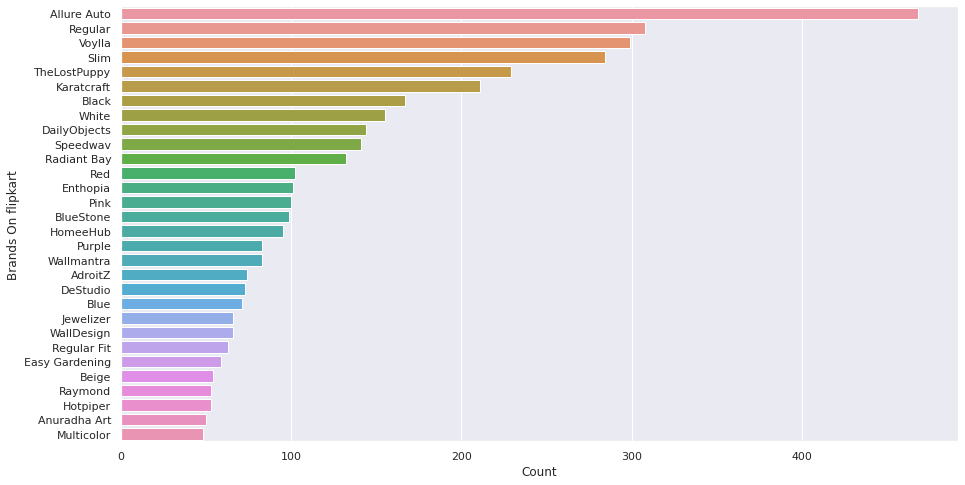

In [24]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=L2,y=L1,data=flipkart)
plt.xlabel("Count")
plt.ylabel("Brands On flipkart")

Allure Auto Brand has highest products, Multicolor Brand has lowest number of products.

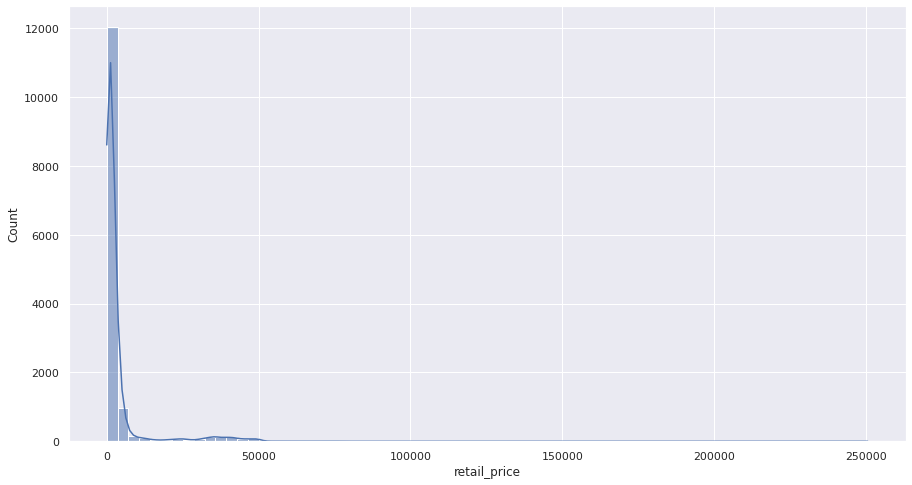

In [25]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart,x="retail_price",kde=True, legend=True,bins=70)

In [26]:
flipkart['retail_price'].describe().astype(int)

count     14058
mean       3640
std        9272
min          35
25%         699
50%        1100
75%        2199
max      250500
Name: retail_price, dtype: int64

In [27]:
#Minimum Product Price id INR 35 and Maximun is INR 250500

#Amazon EDA

In [28]:
flipkart["brand"].value_counts()

Allure Auto        468
Regular            308
Voylla             299
Slim               284
TheLostPuppy       229
                  ... 
ORIFLAME SWEDEN      1
Wella                1
Cayman               1
Nineteen             1
Fun To See           1
Name: brand, Length: 3481, dtype: int64

In [29]:
L1=list(flipkart["brand"].value_counts().keys()[0:30])
L2=list(flipkart["brand"].value_counts().values[0:30])

Text(0, 0.5, 'Brands On flipkart')

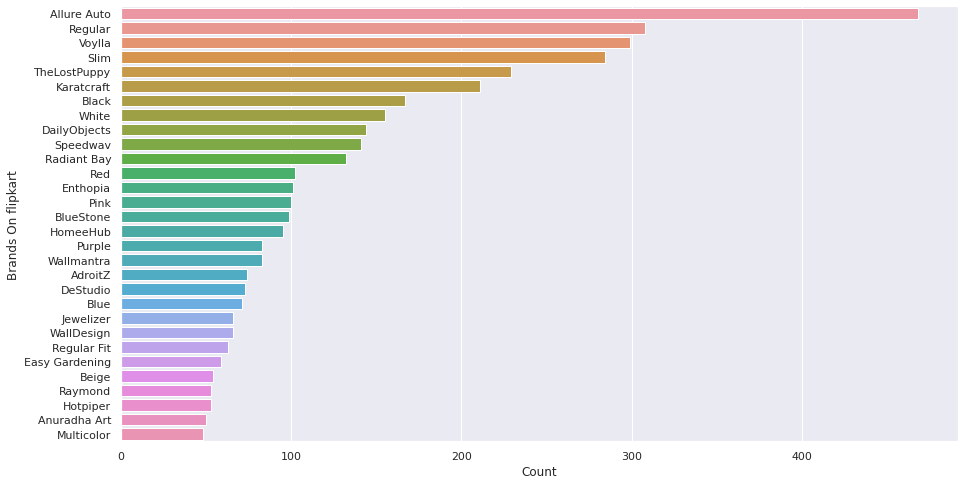

In [30]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=L2,y=L1,data=flipkart)
plt.xlabel("Count")
plt.ylabel("Brands On flipkart")

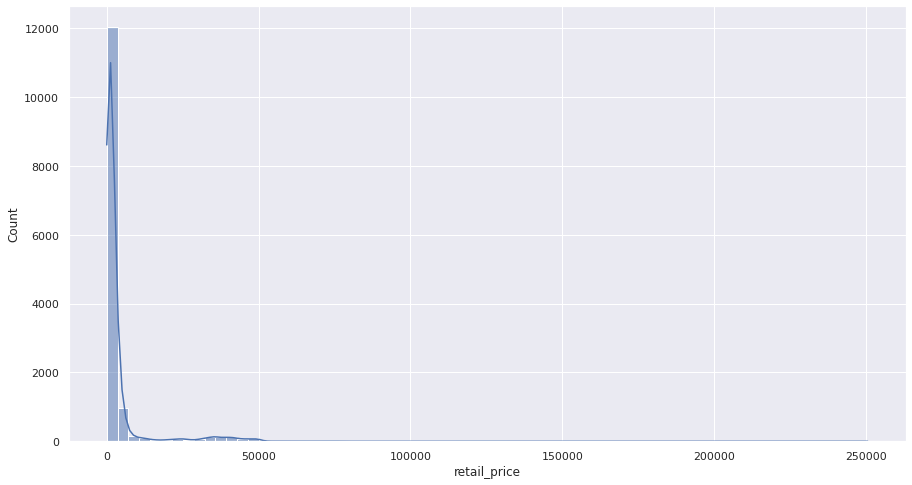

In [31]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart,x="retail_price",kde=True, legend=True,bins=70)

In [32]:
amazon['retail_price'].describe().astype(int)

count     14121
mean       3613
std        9254
min         -20
25%         686
50%        1092
75%        2186
max      250483
Name: retail_price, dtype: int64

Some Products have negative values

Removing products whose price is negative or 0

In [33]:
amazon['retail_price'] = amazon['retail_price'][amazon.retail_price >= 0]

In [34]:
amazon['retail_price'].describe().astype(int)

count     14058
mean       3630
std        9272
min          21
25%         688
50%        1095
75%        2187
max      250483
Name: retail_price, dtype: int64

In [35]:
amazon.columns

Index(['uniq_id', 'product_name', 'retail_price', 'discounted_price', 'brand'], dtype='object')

Renaming Columns

In [36]:
amazon.rename(columns = {'product_name':'Product name in Amazon', 'retail_price':'Retail Price in amazon', 'discounted_price': 'Discounted Price in Amazon',}, inplace = True)

In [37]:
flipkart.rename(columns = {'product_name':'Product name in flipkart', 'retail_price':'Retail Price in flipkart', 'discounted_price': 'Discounted Price in flipkart',}, inplace = True)

Deleting column named brand

In [38]:
flipkart.drop(['brand'], axis=1, inplace=True)
amazon.drop(['brand'], axis=1, inplace=True)

#Merging Both Data Frames

In [39]:
merge=amazon.merge(flipkart,left_on='uniq_id',right_on='uniq_id',how='inner')

In [40]:
merge.head()

,uniq_id,Product name in Amazon,Retail Price in amazon,Discounted Price in Amazon,Product name in flipkart,Retail Price in flipkart,Discounted Price in flipkart
0,7c88739f05009f3ed8b06dab0cb204c2,Havells Havells - Oro 32 One Way Electrical Sw...,21.0,44,Havells Havells - Oro 32 One Way Electrical Sw...,36.0,36.0
1,aa68675f50a0551b8dadb954017a50a1,Geol Wooden Wet and Dry Broom,27.0,39,Geol Wooden Wet and Dry Broom,35.0,35.0
2,0190dcb7c0ed541e6fb6381ff82d9853,Maped Twist and Flex Transparent Rubber Rulers,46.0,54,Maped Twist and Flex Transparent Rubber Rulers,49.0,49.0
3,8cfbbe81571f1f7455762ebcfd415d72,KHANNA JUPITER BOARD & ART PAPER BOX FILE,46.0,57,Khanna Jupiter Board & Art Paper Box File,55.0,47.0
4,948699ab8c947ce56c256f9cf7996761,Tks Cotton Hair Towel,52.0,90,Tks Cotton Hair Towel,70.0,70.0


In [41]:
merge.to_csv('df.csv', index=False)

In [42]:
df=pd.read_csv('/content/df.csv')

In [43]:
#df.isnull().sum()
#df=df.dropna(axis=0)
#df.shape



In [44]:
#df.head()


In [45]:
df.columns

Index(['uniq_id', 'Product name in Amazon', 'Retail Price in amazon',
       'Discounted Price in Amazon', 'Product name in flipkart',
       'Retail Price in flipkart', 'Discounted Price in flipkart'],
      dtype='object')

#Query

In [59]:
import re
#search=[]
search=input("Enter Product To Search:\n")
#search=search.split()



Enter Product To Search:
havells


In [60]:
df.loc[df['Product name in Amazon'].str.contains(search,na=False, flags=re.IGNORECASE)]


,uniq_id,Product name in Amazon,Retail Price in amazon,Discounted Price in Amazon,Product name in flipkart,Retail Price in flipkart,Discounted Price in flipkart
0,7c88739f05009f3ed8b06dab0cb204c2,Havells Havells - Oro 32 One Way Electrical Sw...,21.0,44,Havells Havells - Oro 32 One Way Electrical Sw...,36.0,36.0
66,447a60a4ffffe50ab35276eb3df37263,Havells Crabtree - Murano 10 One Way Electrica...,169.0,216,Havells Crabtree - Murano 10 One Way Electrica...,170.0,170.0
165,7f3cb616bca53705dccff1e91c3654f9,Havells Crabtree - Murano 10 One Way Electrica...,228.0,308,Havells Crabtree - Murano 10 One Way Electrica...,240.0,240.0
2181,e6c65e2597c324eee4e4a5c1e3fa2efa,Havells Havells - Oro 10 One Way Electrical Sw...,502.0,643,Havells Havells - Oro 10 One Way Electrical Sw...,510.0,495.0
4577,5142cc70d7e31a29b8ccb7f0d8ac1341,Havells Crabtree - Murano 32 One Way Electrica...,809.0,969,Havells Crabtree - Murano 32 One Way Electrica...,810.0,810.0
